## Import Necessary Functions

These are required to utilise functions specific for data analysis and visualisations.

In [371]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Read the Data

In [372]:

# Direct link to the CSV file on Google Drive
csv_url = 'https://drive.google.com/uc?id=14HTdhAmJd_U3mJDnwLHPbu6pvh-Yv0vu'

# Read the CSV file from the URL
df = pd.read_csv(csv_url)

df.shape


(10000, 14)

The DataFrame has 10000 rows with 14 attributes. We continue to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling can be done. 


## Initital Exploration

In [373]:
# A quick look
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .head(5) pandas function generates a well-structured format of the csv file with the first 5 rows organised.

In [374]:
# What attributes do we have? 
list(df.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [375]:

# Description of the data 
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [376]:
# Check columns list and missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values!

In [377]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as these are specific to a customer. For data privacy, we remove the surname as well.

In [378]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

The parameter axis = 1 specifies we want to drop these labels from the column. 

We will exclude RowNumber, CustomerId and Surname for reasons explained above.

In [379]:
# Review the top rows of what is left of the data frame
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [380]:
df.shape

(10000, 11)

Notice we now have 1000 rows and only 11 attributes. 

In [381]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we mostly have categorical variables and 5 continuous variables.

## Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.



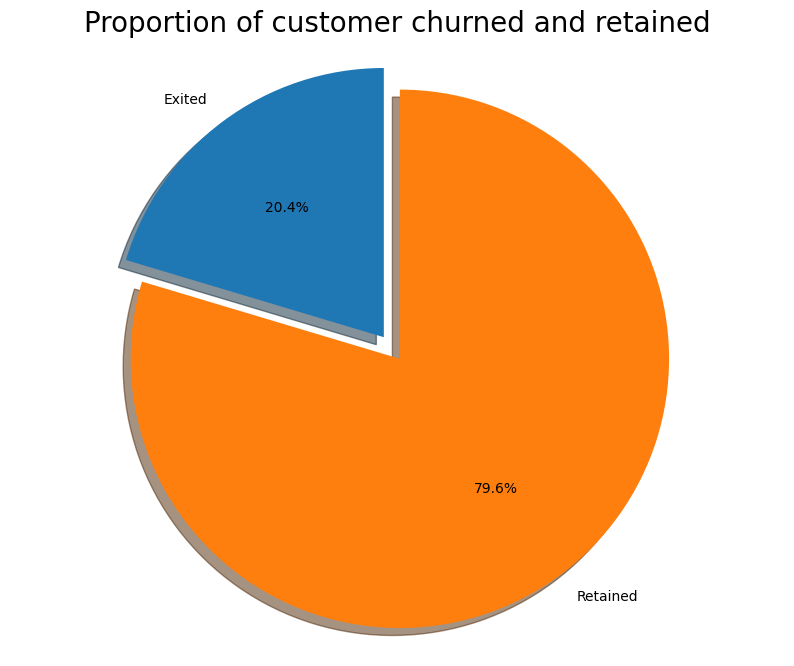

In [382]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# We first review Exited vs Churned in relation to the categorical variables

We want to analyse the number of individuals who exited in relation to a categorical variable. For instance, we want to determine how many customers either exited or remained in Germany.

<Axes: xlabel='IsActiveMember', ylabel='count'>

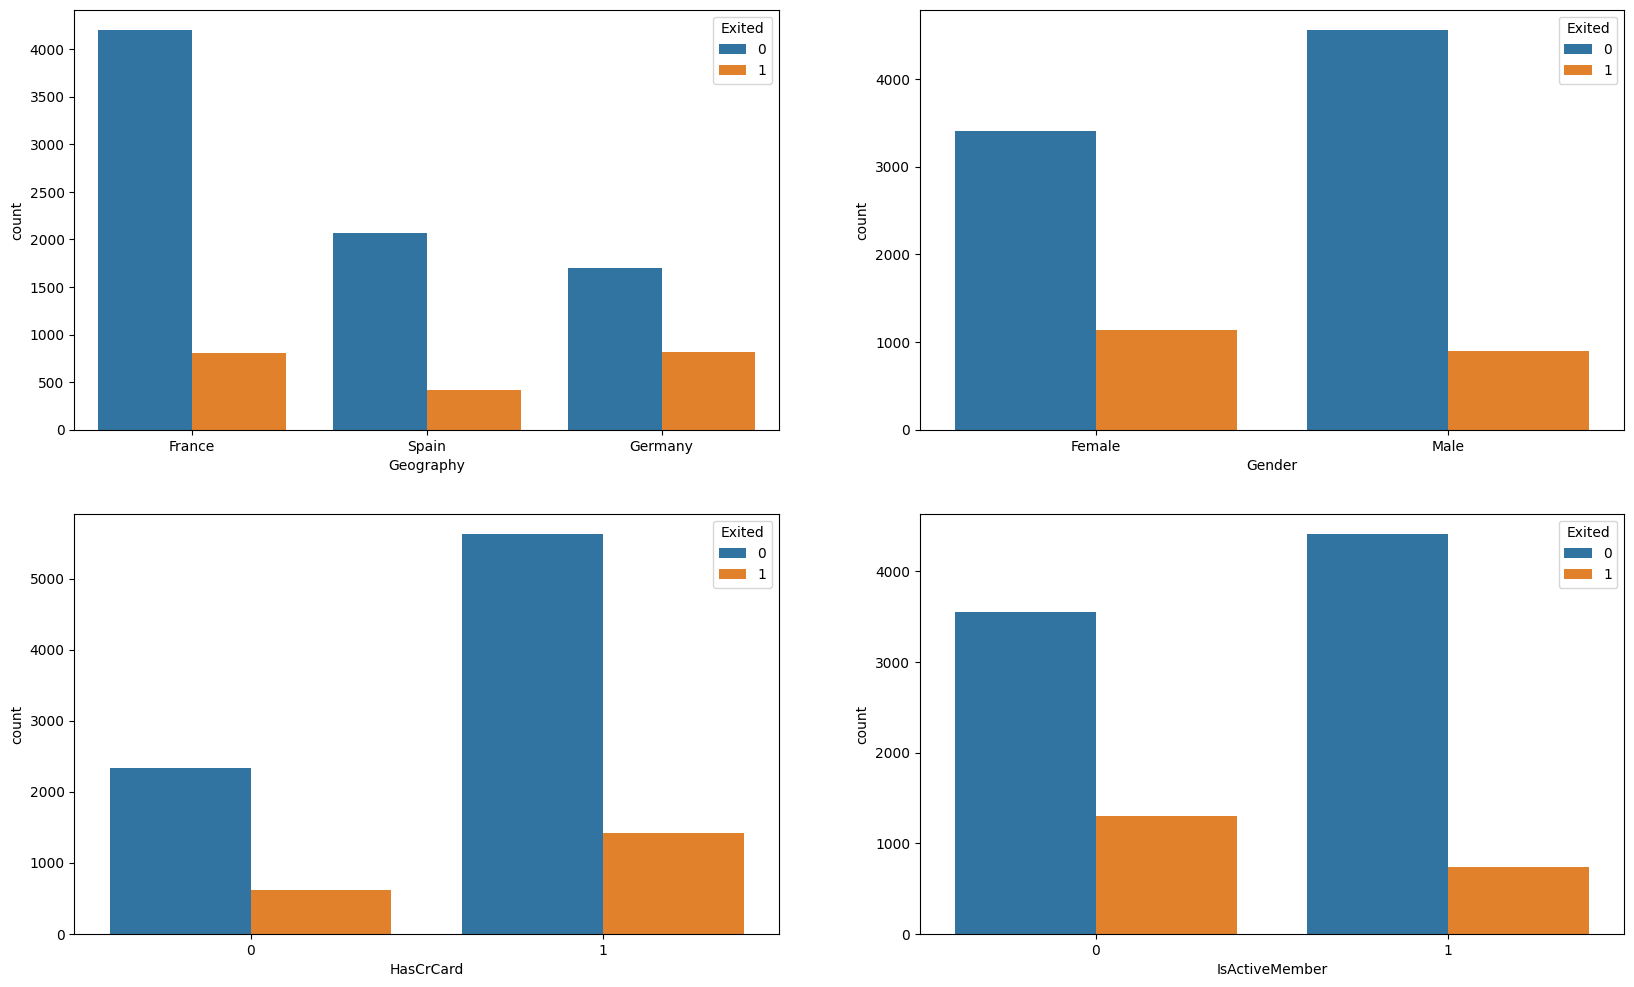

In [383]:
    # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

fig, axis = plt.subplots(2,2,figsize = (20,12))


# Next we review how the continuous data attributes relates to Exited vs Retained 

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

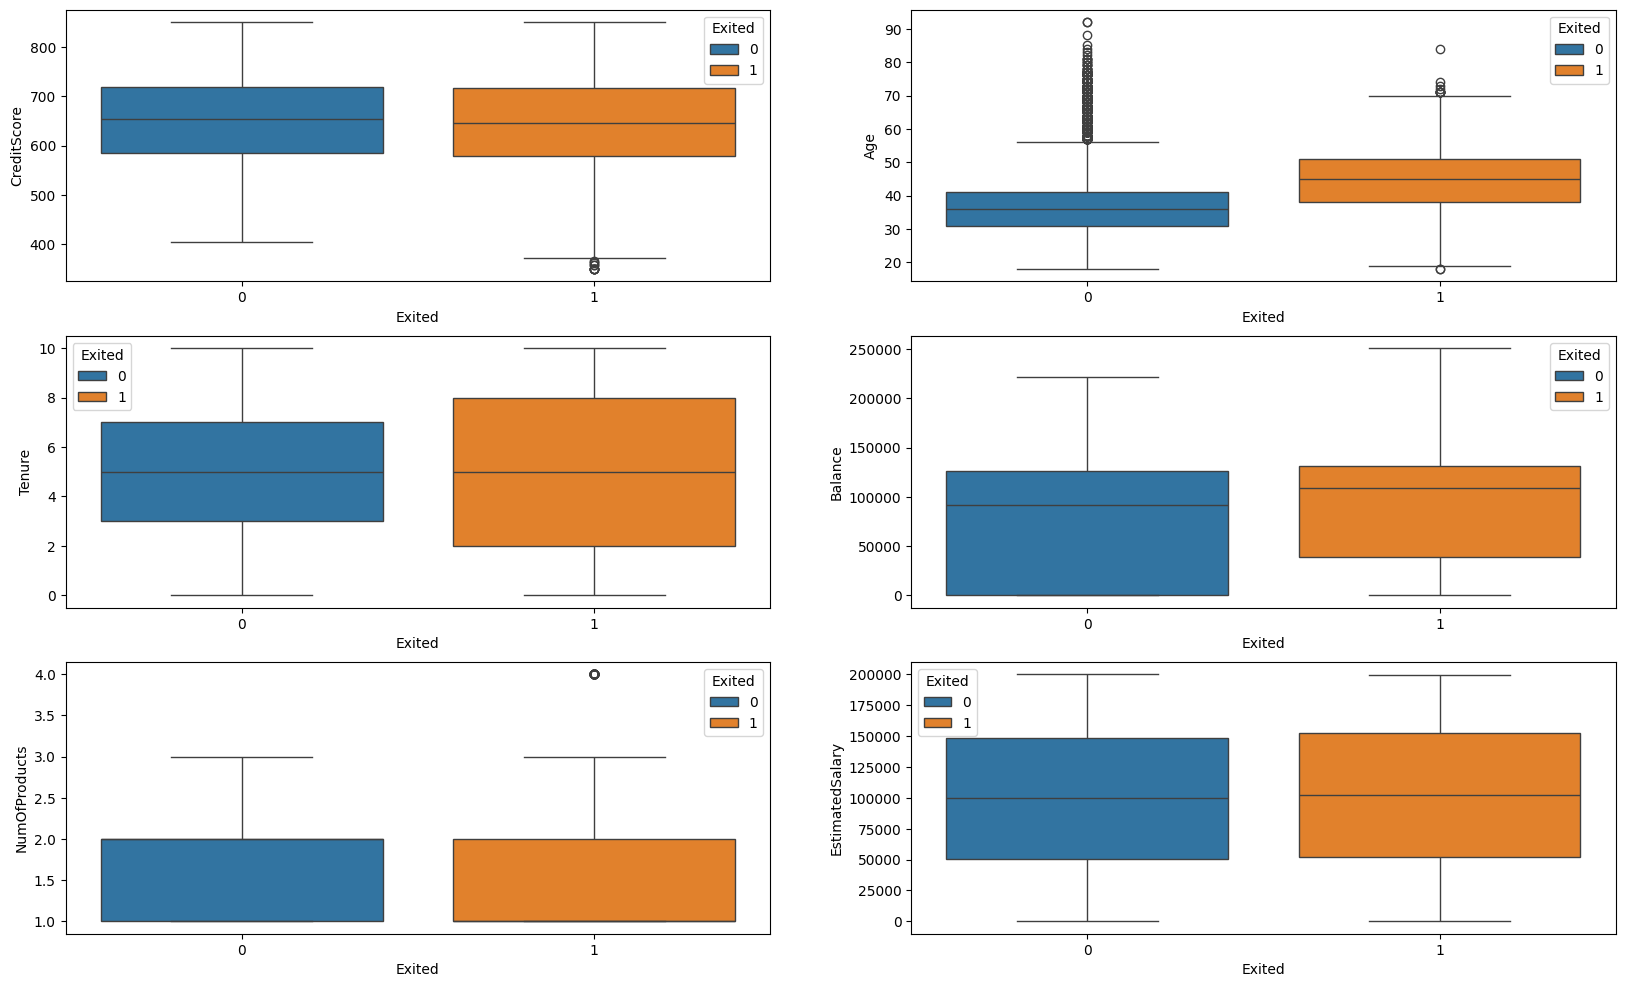

In [384]:
  # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])



We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

In [385]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# 4. Feature engineering 
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

## Split the dataset


In [387]:
# Example Split train, test data

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 6)


## Feature engineering 

In [388]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary

In [389]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)

In [390]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

# 5. Data prep for model fitting 

In [391]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8247,0,505,25,5,114268.85,2,126728.27,0.901684,0.200000,20.200000,1,1,Germany,Female
705,1,750,40,5,168286.81,3,20451.99,8.228383,0.125000,18.750000,1,0,Germany,Male
4451,0,578,34,4,175111.11,1,74858.30,2.339234,0.117647,17.000000,1,1,France,Male
4328,0,581,55,6,0.00,1,22442.13,0.000000,0.109091,10.563636,1,1,France,Female
3882,0,488,22,6,0.00,2,66393.89,0.000000,0.272727,22.181818,1,1,France,Female


In [392]:
'''For the one hot variables, we change 0 to -1 so that some models can capture 
a negative relationship between the feature not appearing and the target variable.
This is because -1 actively influences the weighted sum computed during the model training, 
particularly in neural networks, whereas 0 would simply not contribute. '''

df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8247,0,505,25,5,114268.85,2,126728.27,0.901684,0.200000,20.200000,1,1,Germany,Female
705,1,750,40,5,168286.81,3,20451.99,8.228383,0.125000,18.750000,1,-1,Germany,Male
4451,0,578,34,4,175111.11,1,74858.30,2.339234,0.117647,17.000000,1,1,France,Male
4328,0,581,55,6,0.00,1,22442.13,0.000000,0.109091,10.563636,1,1,France,Female
3882,0,488,22,6,0.00,2,66393.89,0.000000,0.272727,22.181818,1,1,France,Female


In [393]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Female,Gender_Male
8247,0,505,25,5,114268.85,2,126728.27,0.901684,0.200000,20.200000,1,1,1,-1,-1,1,-1
705,1,750,40,5,168286.81,3,20451.99,8.228383,0.125000,18.750000,1,-1,1,-1,-1,-1,1
4451,0,578,34,4,175111.11,1,74858.30,2.339234,0.117647,17.000000,1,1,-1,1,-1,-1,1
4328,0,581,55,6,0.00,1,22442.13,0.000000,0.109091,10.563636,1,1,-1,1,-1,1,-1
3882,0,488,22,6,0.00,2,66393.89,0.000000,0.272727,22.181818,1,1,-1,1,-1,1,-1


In [394]:
'''MinMax scaling transforms features to scale them within a specific range, typically [0, 1].'''

# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Female,Gender_Male
8247,0,0.310,0.094595,0.5,0.455439,0.333333,0.633500,0.000680,0.360000,0.384334,1,1,1,-1,-1,1,-1
705,1,0.800,0.297297,0.5,0.670738,0.666667,0.101859,0.006205,0.225000,0.348012,1,-1,1,-1,-1,-1,1
4451,0,0.456,0.216216,0.4,0.697937,0.000000,0.374024,0.001764,0.211765,0.304175,1,1,-1,1,-1,-1,1
4328,0,0.462,0.500000,0.6,0.000000,0.000000,0.111815,0.000000,0.196364,0.142946,1,1,-1,1,-1,1,-1
3882,0,0.276,0.054054,0.6,0.000000,0.333333,0.331681,0.000000,0.490909,0.433978,1,1,-1,1,-1,1,-1


In [395]:
print(df_train.columns)
print(df_test.columns)

Index(['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember',
       'Geography_Germany', 'Geography_France', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [396]:
# Prep test data in same manor as done with training data

def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add engineered features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age)

    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]

    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1

    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)

    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1   

    
    ''' This is crucial to prevent data leakage, where information from the test or prediction datasets 
        influences the model training process. By using statistics derived only from the training data, 
        you ensure that the model's evaluation on new (test or prediction) data is fair'''

    # MinMax scaling continuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)

    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

In [397]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)


/var/folders/5b/5l6jp2zn0sn5pggqy7bzs4b00000gn/T/ipykernel_52264/2331442323.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
/var/folders/5b/5l6jp2zn0sn5pggqy7bzs4b00000gn/T/ipykernel_52264/2331442323.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
/var/folders/5b/5l6jp2zn0sn5pggqy7bzs4b00000gn/T/ipykernel_52264/2331442323.py:24: SettingWithCopyWarning: 
A value is trying to be set on a c

In [398]:
df_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Female,Gender_Male
739,0,0.684,0.135135,0.8,0.378875,0.333333,0.221759,0.001614,0.514286,0.497416,1,-1,-1,1,-1,1,-1
9426,1,0.298,0.472973,0.1,0.299825,0.333333,0.724148,0.000392,0.033962,0.114175,-1,-1,-1,-1,1,1,-1
8200,1,0.834,0.391892,0.5,0.000000,0.000000,0.609669,0.000000,0.191489,0.287120,1,-1,-1,-1,1,-1,1
5880,0,0.374,0.135135,0.0,0.354579,0.333333,0.949212,0.000353,0.000000,0.358748,1,1,-1,1,-1,-1,1
9114,0,0.382,0.243243,0.5,0.000000,0.333333,0.623833,0.000000,0.250000,0.254771,1,-1,-1,1,-1,-1,1


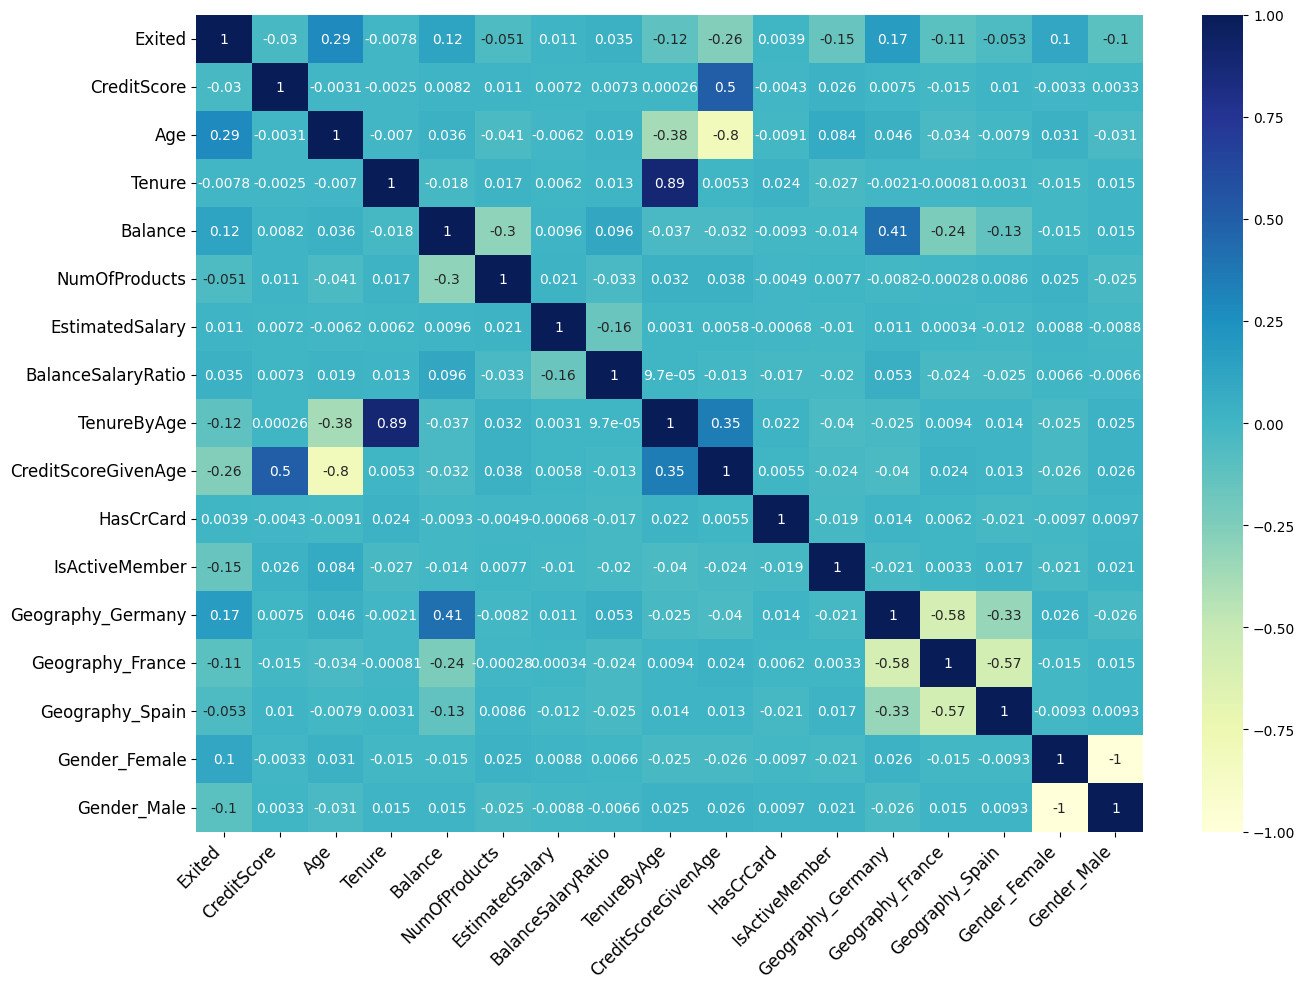

In [399]:
# Heat map analysis
plt.figure(figsize = (14, 10))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [400]:
# Extract and sort correlations by absolute value
correlations = df_train.corr()["Exited"].abs().sort_values(ascending = False)
print(correlations)

Exited                 1.000000
Age                    0.288580
CreditScoreGivenAge    0.259130
Geography_Germany      0.174224
IsActiveMember         0.154936
TenureByAge            0.117245
Balance                0.117209
Geography_France       0.105651
Gender_Female          0.101872
Gender_Male            0.101872
Geography_Spain        0.053073
NumOfProducts          0.050836
BalanceSalaryRatio     0.035173
CreditScore            0.030422
EstimatedSalary        0.010583
Tenure                 0.007789
HasCrCard              0.003937
Name: Exited, dtype: float64


In [401]:
data = [df_train,df_test]

for dataset in data: 
    dataset.drop(['Tenure','EstimatedSalary','HasCrCard'], axis = 1, inplace = True) 

In [402]:
df_train.head()

,Exited,CreditScore,Age,Balance,NumOfProducts,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Female,Gender_Male
8247,0,0.310,0.094595,0.455439,0.333333,0.000680,0.360000,0.384334,1,1,-1,-1,1,-1
705,1,0.800,0.297297,0.670738,0.666667,0.006205,0.225000,0.348012,-1,1,-1,-1,-1,1
4451,0,0.456,0.216216,0.697937,0.000000,0.001764,0.211765,0.304175,1,-1,1,-1,-1,1
4328,0,0.462,0.500000,0.000000,0.000000,0.000000,0.196364,0.142946,1,-1,1,-1,1,-1
3882,0,0.276,0.054054,0.000000,0.333333,0.000000,0.490909,0.433978,1,-1,1,-1,1,-1


In [403]:
df_test.head()

,Exited,CreditScore,Age,Balance,NumOfProducts,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Female,Gender_Male
739,0,0.684,0.135135,0.378875,0.333333,0.001614,0.514286,0.497416,-1,-1,1,-1,1,-1
9426,1,0.298,0.472973,0.299825,0.333333,0.000392,0.033962,0.114175,-1,-1,-1,1,1,-1
8200,1,0.834,0.391892,0.000000,0.000000,0.000000,0.191489,0.287120,-1,-1,-1,1,-1,1
5880,0,0.374,0.135135,0.354579,0.333333,0.000353,0.000000,0.358748,1,-1,1,-1,-1,1
9114,0,0.382,0.243243,0.000000,0.333333,0.000000,0.250000,0.254771,-1,-1,1,-1,-1,1


## Model Building

In [404]:
train_X = df_train.drop("Exited", axis = 1)
train_y = df_train["Exited"]

test_X = df_test.drop("Exited", axis = 1)
test_y = df_test["Exited"]

In [405]:
model = LogisticRegression()
model.fit(train_X, train_y)
predict_y = model.predict(test_X)

accuracy = accuracy_score(test_y, predict_y)

print(accuracy)


0.82


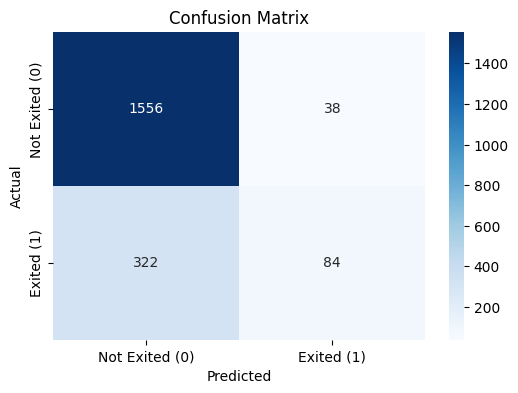

In [406]:
# Confusion matrix
conf_matrix = confusion_matrix(test_y, predict_y)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited (0)', 'Exited (1)'], yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

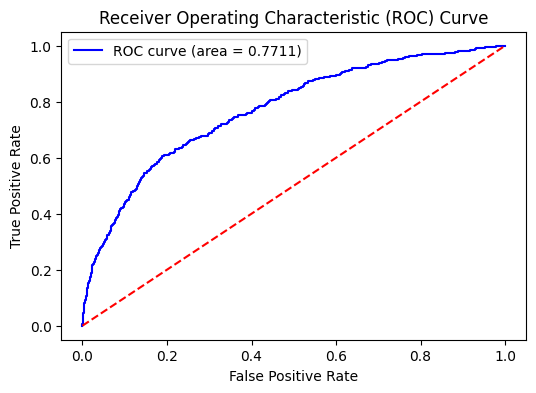

In [407]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(test_X)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_score(test_y, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [408]:
df_train.columns

Index(['Exited', 'CreditScore', 'Age', 'Balance', 'NumOfProducts',
       'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge',
       'IsActiveMember', 'Geography_Germany', 'Geography_France',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')